#Data Cleaning and Preparation

In [58]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#Load dataset into pandas dataframe
data=pd.read_csv("Cardiotocographic.csv", index_col=0)
data

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,,,,,,,,,,,,,
120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464


In [37]:
data.shape

(2126, 13)

There are 2126 rows and 13 columns. Some columns have a large number of 0.00 values. DS and DP in particular seem to have a lot of 0.00 values

In [38]:
#Check for number of unique values in each column
data.nunique(axis=0)

,0
AC,1067
FM,776
UC,1364
DL,822
DS,114
DP,264
ASTV,183
MSTV,165
ALTV,195
MLTV,351


Since there are multiple unique values, the entire column is not 0.00. Hence, we will not drop the column.

In [39]:
#Check if datatypes are as expected
data.dtypes

,0
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64
MLTV,float64


Data Types are as expected. No data type conversion is required.

##Check for Duplicates

In [40]:
#Count of duplicates
data[data.duplicated()].shape

(2, 13)

In [41]:
#Print the duplicated rows
data[data.duplicated()]

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,,,,,,,,,,,,,
122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [42]:
#Removing duplicate row
data_cleaned=data.drop_duplicates()

In [43]:
data_cleaned.shape

(2124, 13)

There are 2 duplicated rows and both have been removed. The number of rows in the dataset have been reduced from 2126 to 2124.

##Handling Missing Values

In [44]:
#Gather information about dataset
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 120.0 to 142.0
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AC        2104 non-null   float64
 1   FM        2124 non-null   float64
 2   UC        2124 non-null   float64
 3   DL        2124 non-null   float64
 4   DS        2103 non-null   float64
 5   DP        2103 non-null   float64
 6   ASTV      2124 non-null   float64
 7   MSTV      2124 non-null   float64
 8   ALTV      2124 non-null   float64
 9   MLTV      2103 non-null   float64
 10  Width     2103 non-null   float64
 11  Tendency  2103 non-null   float64
 12  NSP       2103 non-null   float64
dtypes: float64(13)
memory usage: 232.3 KB


In [45]:
data_cleaned.isnull().sum()

,0
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0
MLTV,21


Since there are 20-21 null rows, we can apply imputation rather than deleting the rows entirely as we may lose important information held in other columns.

In [47]:
#Mean imputation
mean = data_cleaned.mean()
print(mean)
data_cleaned = data_cleaned.fillna(mean)

AC           0.003220
FM           0.009904
UC           0.004394
DL           0.001897
DS           0.000003
DP           0.000175
ASTV        47.012459
MSTV         1.364345
ALTV        10.295650
MLTV         8.280546
Width       70.461052
Tendency     0.316672
NSP          1.304797
dtype: float64


In [48]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 120.0 to 142.0
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AC        2124 non-null   float64
 1   FM        2124 non-null   float64
 2   UC        2124 non-null   float64
 3   DL        2124 non-null   float64
 4   DS        2124 non-null   float64
 5   DP        2124 non-null   float64
 6   ASTV      2124 non-null   float64
 7   MSTV      2124 non-null   float64
 8   ALTV      2124 non-null   float64
 9   MLTV      2124 non-null   float64
 10  Width     2124 non-null   float64
 11  Tendency  2124 non-null   float64
 12  NSP       2124 non-null   float64
dtypes: float64(13)
memory usage: 232.3 KB


#Statistical Summary

In [32]:
#Obtain statistical summary of data
data_cleaned.describe()

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2104.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280546,70.461052,0.316672,1.304797
std,0.004392,0.067571,0.003340,0.003344,0.000142,0.000840,18.812403,1.174084,21.212676,7.774969,42.939806,0.645855,0.644857
min,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.000000
75%,0.005650,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [49]:
#Compute median
data_cleaned.median()

,0
AC,0.001668
FM,0.000000
UC,0.004486
DL,0.000000
DS,0.000000
DP,0.000000
ASTV,49.000000
MSTV,1.200000
ALTV,0.000000
MLTV,7.500000


Statistical Summary:



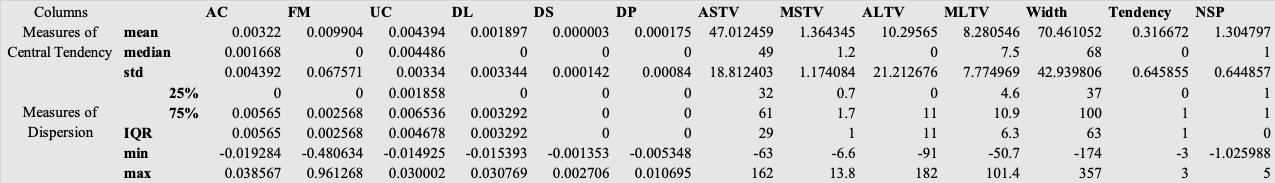



Interesting findings:

1. The minimum values in a lot of columns are negative.

2. AC, FM, DL, DS, MSTV, ALTV, MLTV, and Tendency have an unexpectedly large standard deviation (for the range of each of their values)

3. The 25% quartile value is 0 but that is expected if there are negative values.

4. The range of a lot of columns are significantly within the decimals.

#Data Visualization

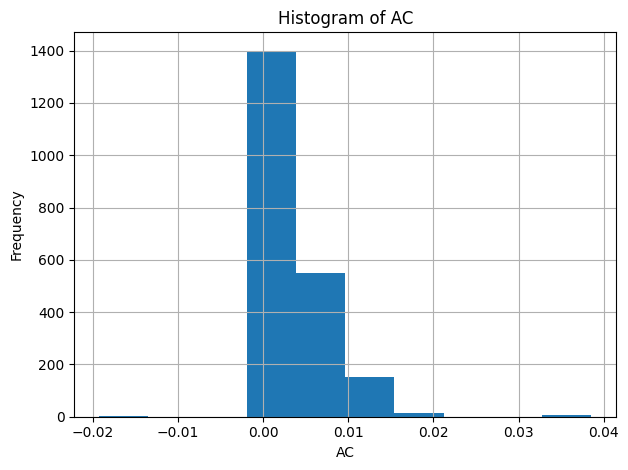

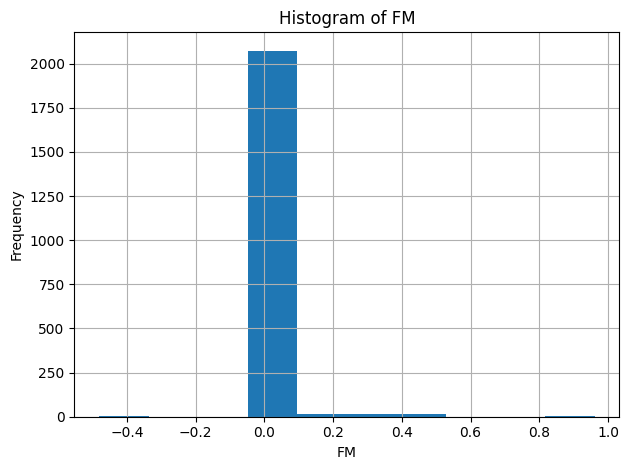

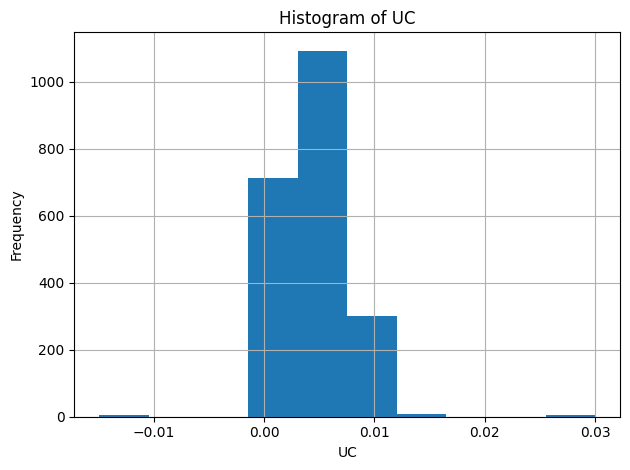

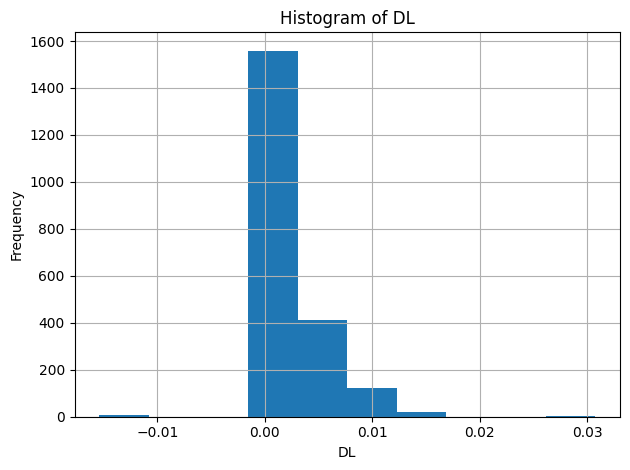

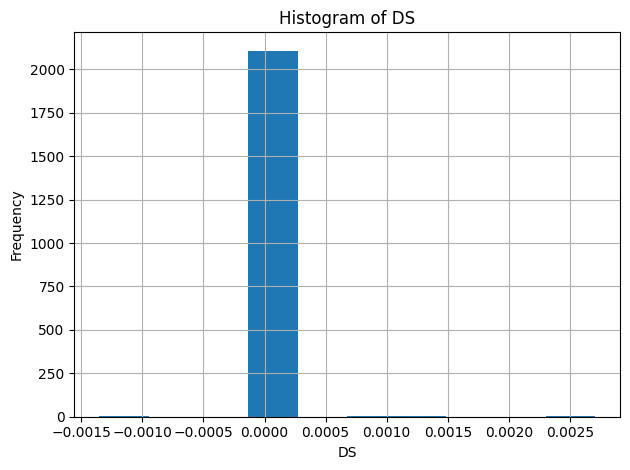

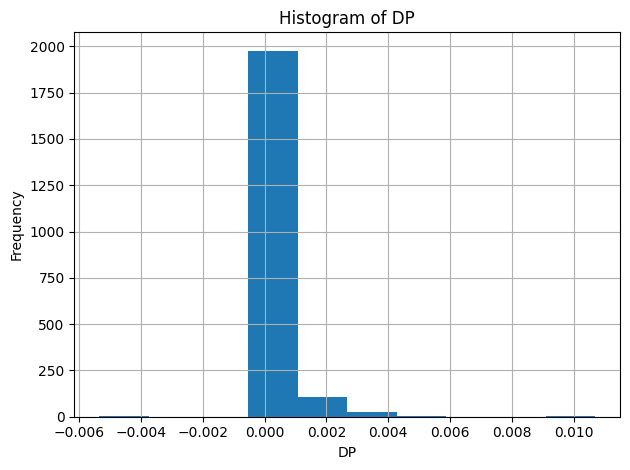

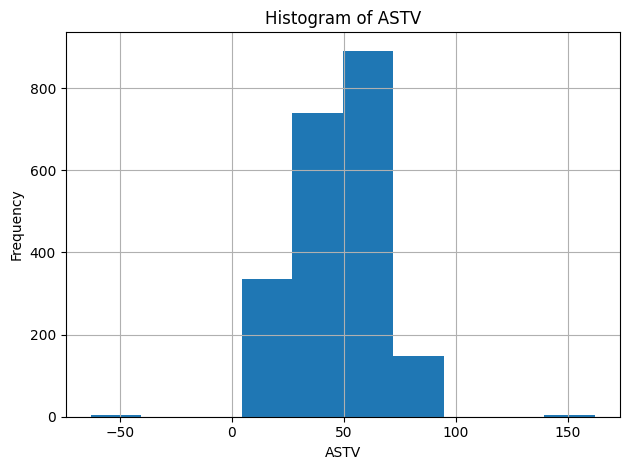

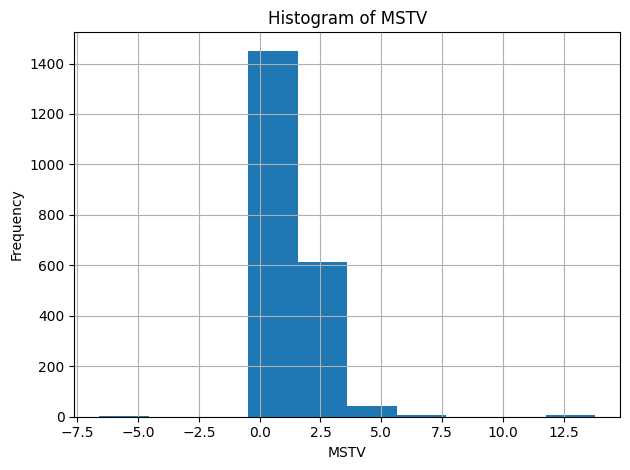

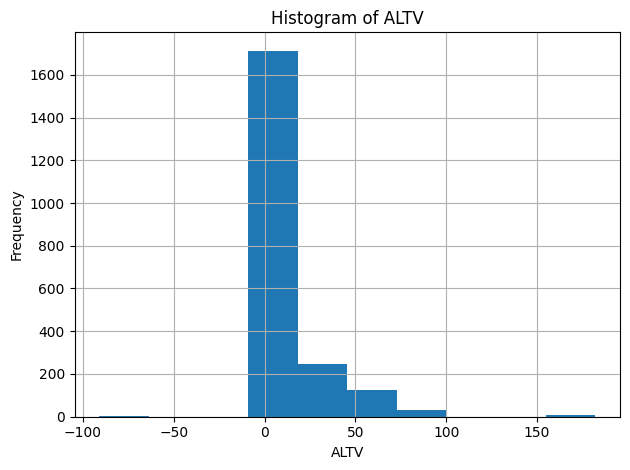

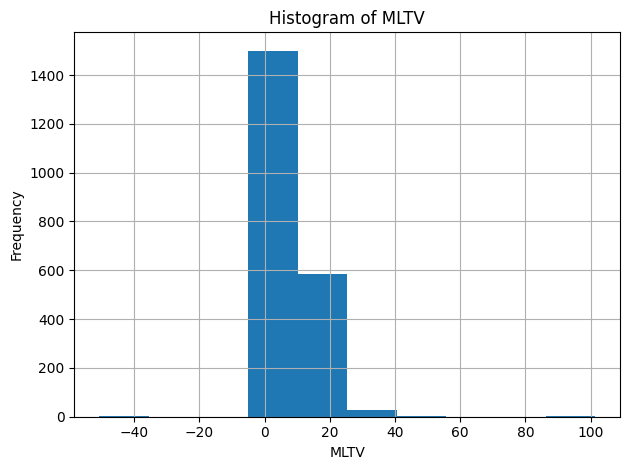

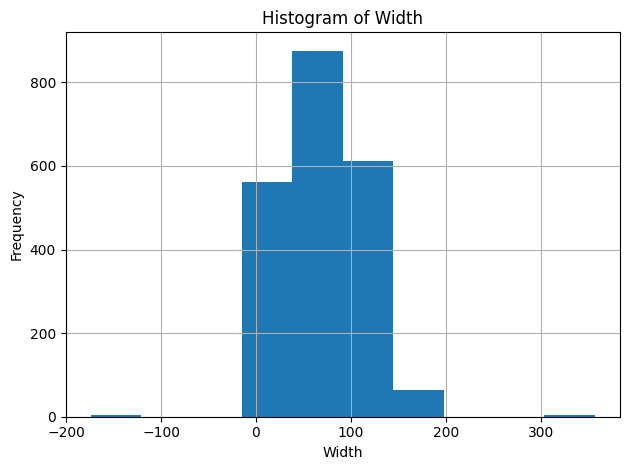

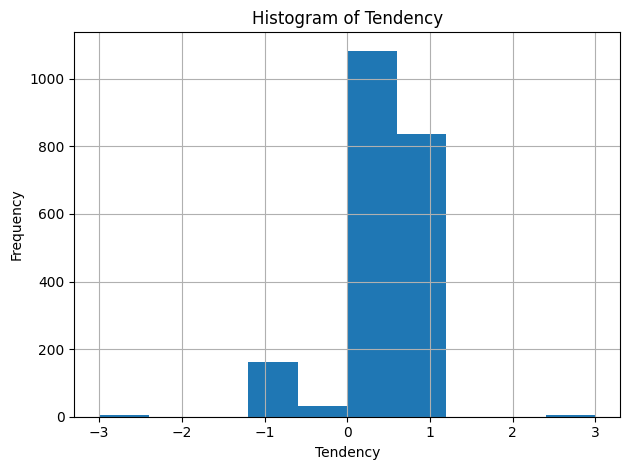

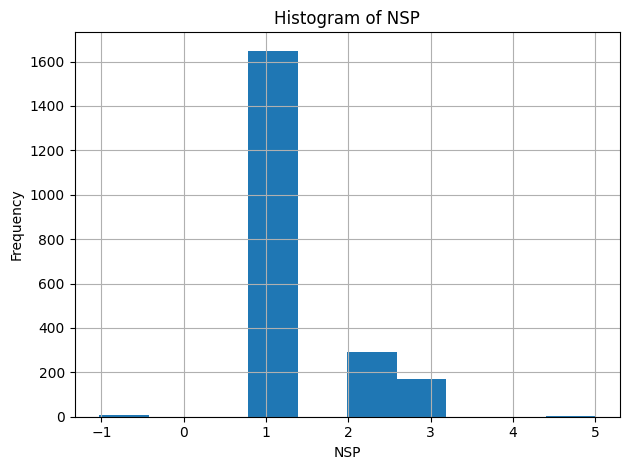

In [59]:
#Generate histograms
for col in data_cleaned:
    plt.figure()
    data_cleaned[col].hist()
    #plt.hist(numerical_data[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

In [60]:
data_cleaned.skew()

,0
AC,2.025927
FM,6.749691
UC,0.973685
DL,2.008927
DS,8.456793
DP,6.451156
ASTV,0.054887
MSTV,4.141709
ALTV,2.979526
MLTV,3.560900


Whiskers of AC: [-0.000184863, 0.014023732]
Outliers of AC: [-0.019283747, -0.019283747, -0.019283747, -0.019283747, 0.014064698, 0.014067995, 0.014178482, 0.014178482, 0.014230272, 0.014302741, 0.014319809, 0.0144, 0.014444444, 0.014705882, 0.014725569, 0.014806378, 0.014842301, 0.014906832, 0.01501251, 0.01511335, 0.015165877, 0.015258216, 0.0155521, 0.0155902, 0.015642458, 0.015781923, 0.015906681, 0.016, 0.016423358, 0.017073171, 0.017241379, 0.01734104, 0.017391304, 0.017667845, 0.017857143, 0.019283747, 0.038567494, 0.038567494, 0.038567494, 0.038567494, 0.038567494, 0.038567494]
Number of outliers: 42
Whiskers of FM: [-0.003434785, 0.006272401]
Outliers of FM: [-0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.480633803, -0.005105536, 0.006430868, 0.006493506, 0.006518905, 0.006525285, 0.006535948, 0.006564551, 0.006593407, 0.006603774, 0.006651885, 0.006672227, 0.006672227, 0.006672227, 0.00669344, 0.006726457, 0.006751055, 0.00678733, 0.006968641, 0.0069

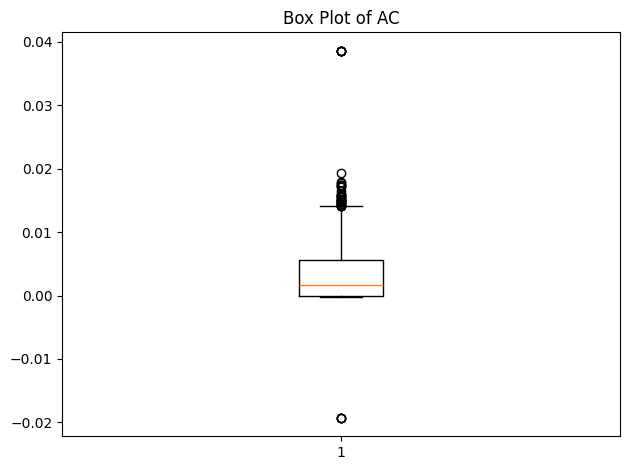

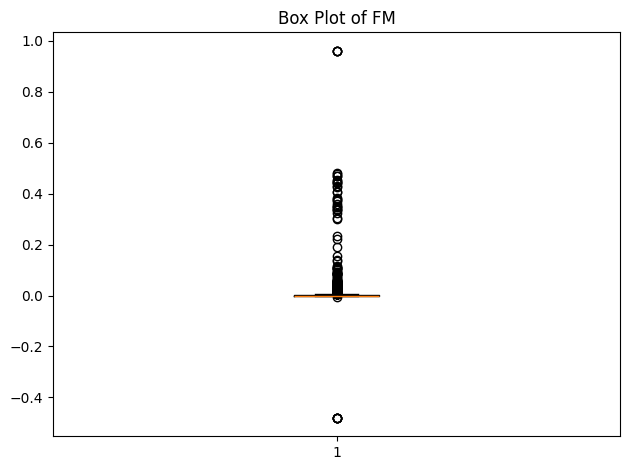

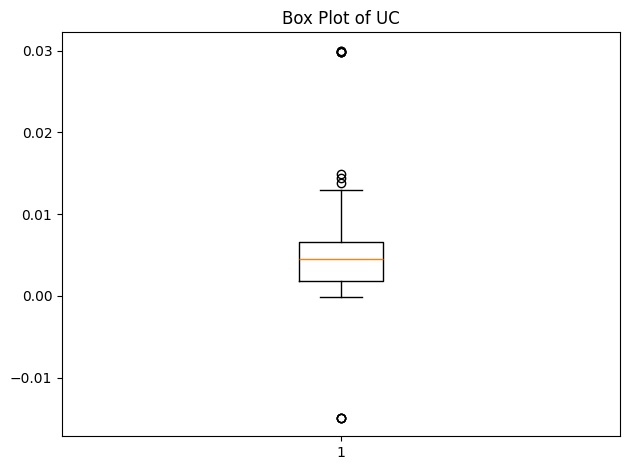

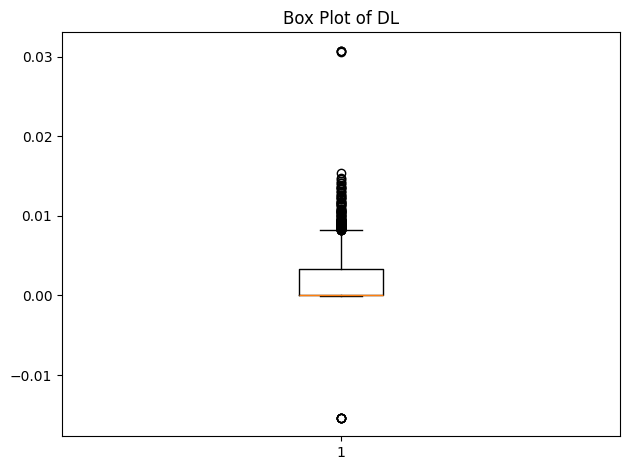

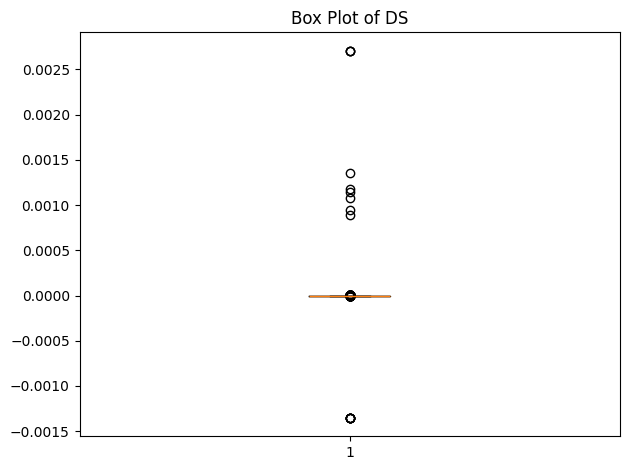

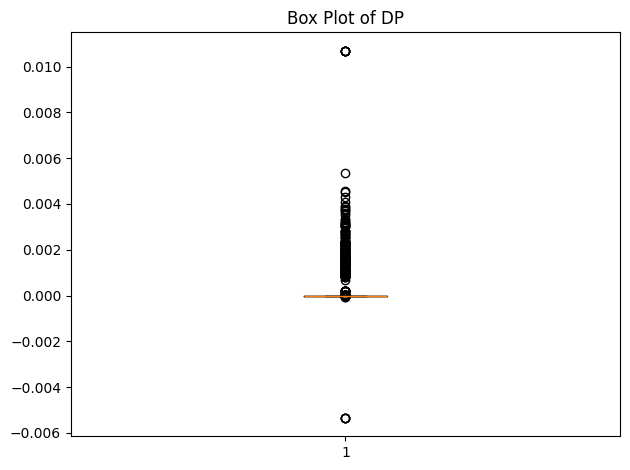

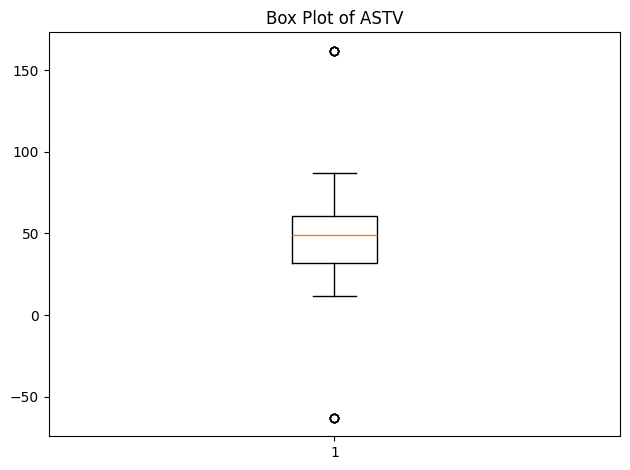

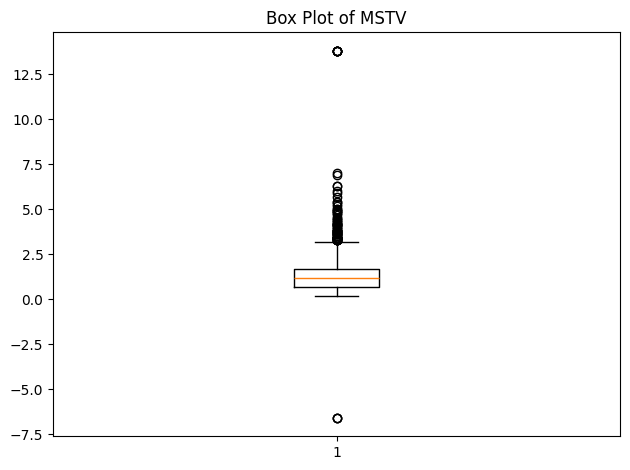

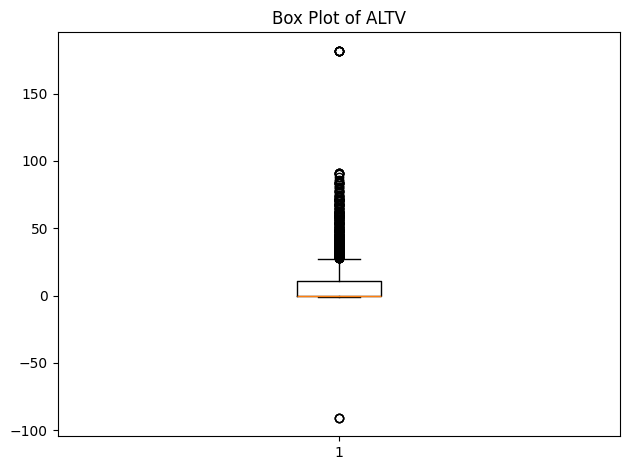

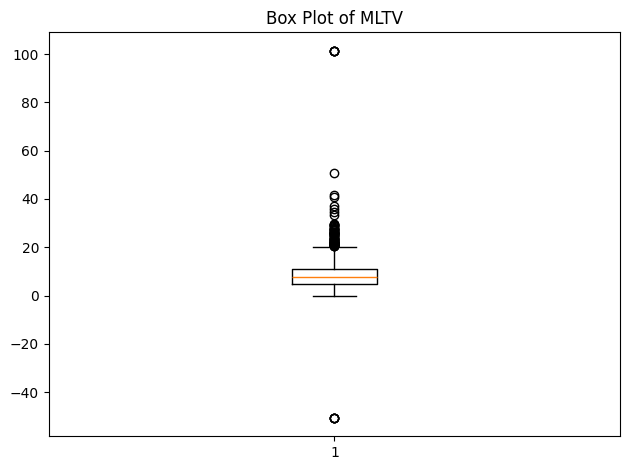

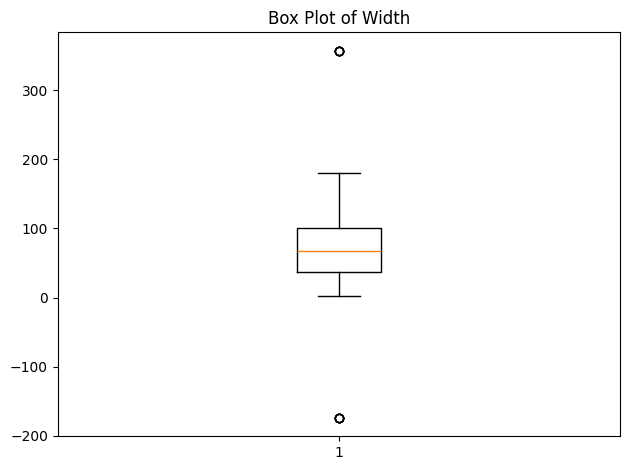

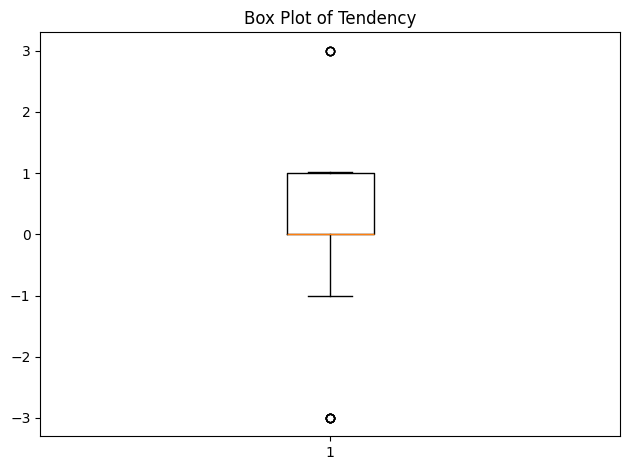

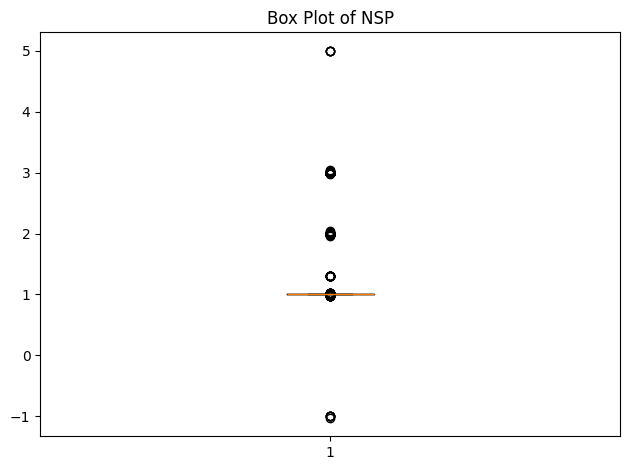

In [62]:
for col in data_cleaned:
    plt.figure()
    box = plt.boxplot(data_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

    #To get the whiskers
    whiskers = [item.get_ydata()[1] for item in box['whiskers']]
    print(f'Whiskers of {col}:', whiskers)

    #Extracting outliers
    outliers = [ydata for item in box['fliers'] for ydata in item.get_ydata()]
    outliers.sort()
    print(f'Outliers of {col}: {outliers}')
    print(f'Number of outliers:' , len(outliers))

Inference from Histogram and Boxplot:

1. AC: Most values lie between 0.00-0.02. Data is right-skewed with skewness of 2.03. Number of Outliers is 42.

2. FM: Most values lie between 0.00-0.1. Data is right-skewed with skewness of 0.97. Number of Outliers is 347.

3. UC: Most values lie between 0.00-0.01. Data is right-skewed with skewness of 2.01. Number of Outliers is 13.

3. DL: Most values lie between 0.00-0.01. Data is right-skewed with skewness of 2.03. Number of Outliers is 125.

3. DS: Data is right-skewed with skewness of 8.46. Number of Outliers is 141.

DP: Most values lie between 0.00-0.02. Data is right-skewed with skewness of 6.45. Number of Outliers is 305.

3. ASTV: Most values lie between 0.00-100. Data is right-skewed with skewness of 0.054. Number of Outliers is 10.

3. MSTV: Most values lie between 0.00-5. Data is right-skewed with skewness of 2.03. Number of Outliers is 80.

3. ALTV: Most values lie between 0.00-100. Data is right-skewed with skewness of 2.98. Number of Outliers is 318.

3. MLTV: Most values lie between 0.00-40. Data is right-skewed with skewness of 3.56. Number of Outliers is 81.

3. Width: Most values lie between 0.00-200. Data is right-skewed with skewness of 0.5. Number of Outliers is 10.

3. Tendency: Most values lie between -1 - 1. Data is left-skewed with skewness of -0.5. Number of Outliers is 10.

3. NSP: Most values lie between 1-3. Data is right-skewed with skewness of 1.81. Number of Outliers is 580.

FM, DL, DS, DP, ALTV, and NSP have high number of outliers.

##Scatterplot and Correlation Analysis

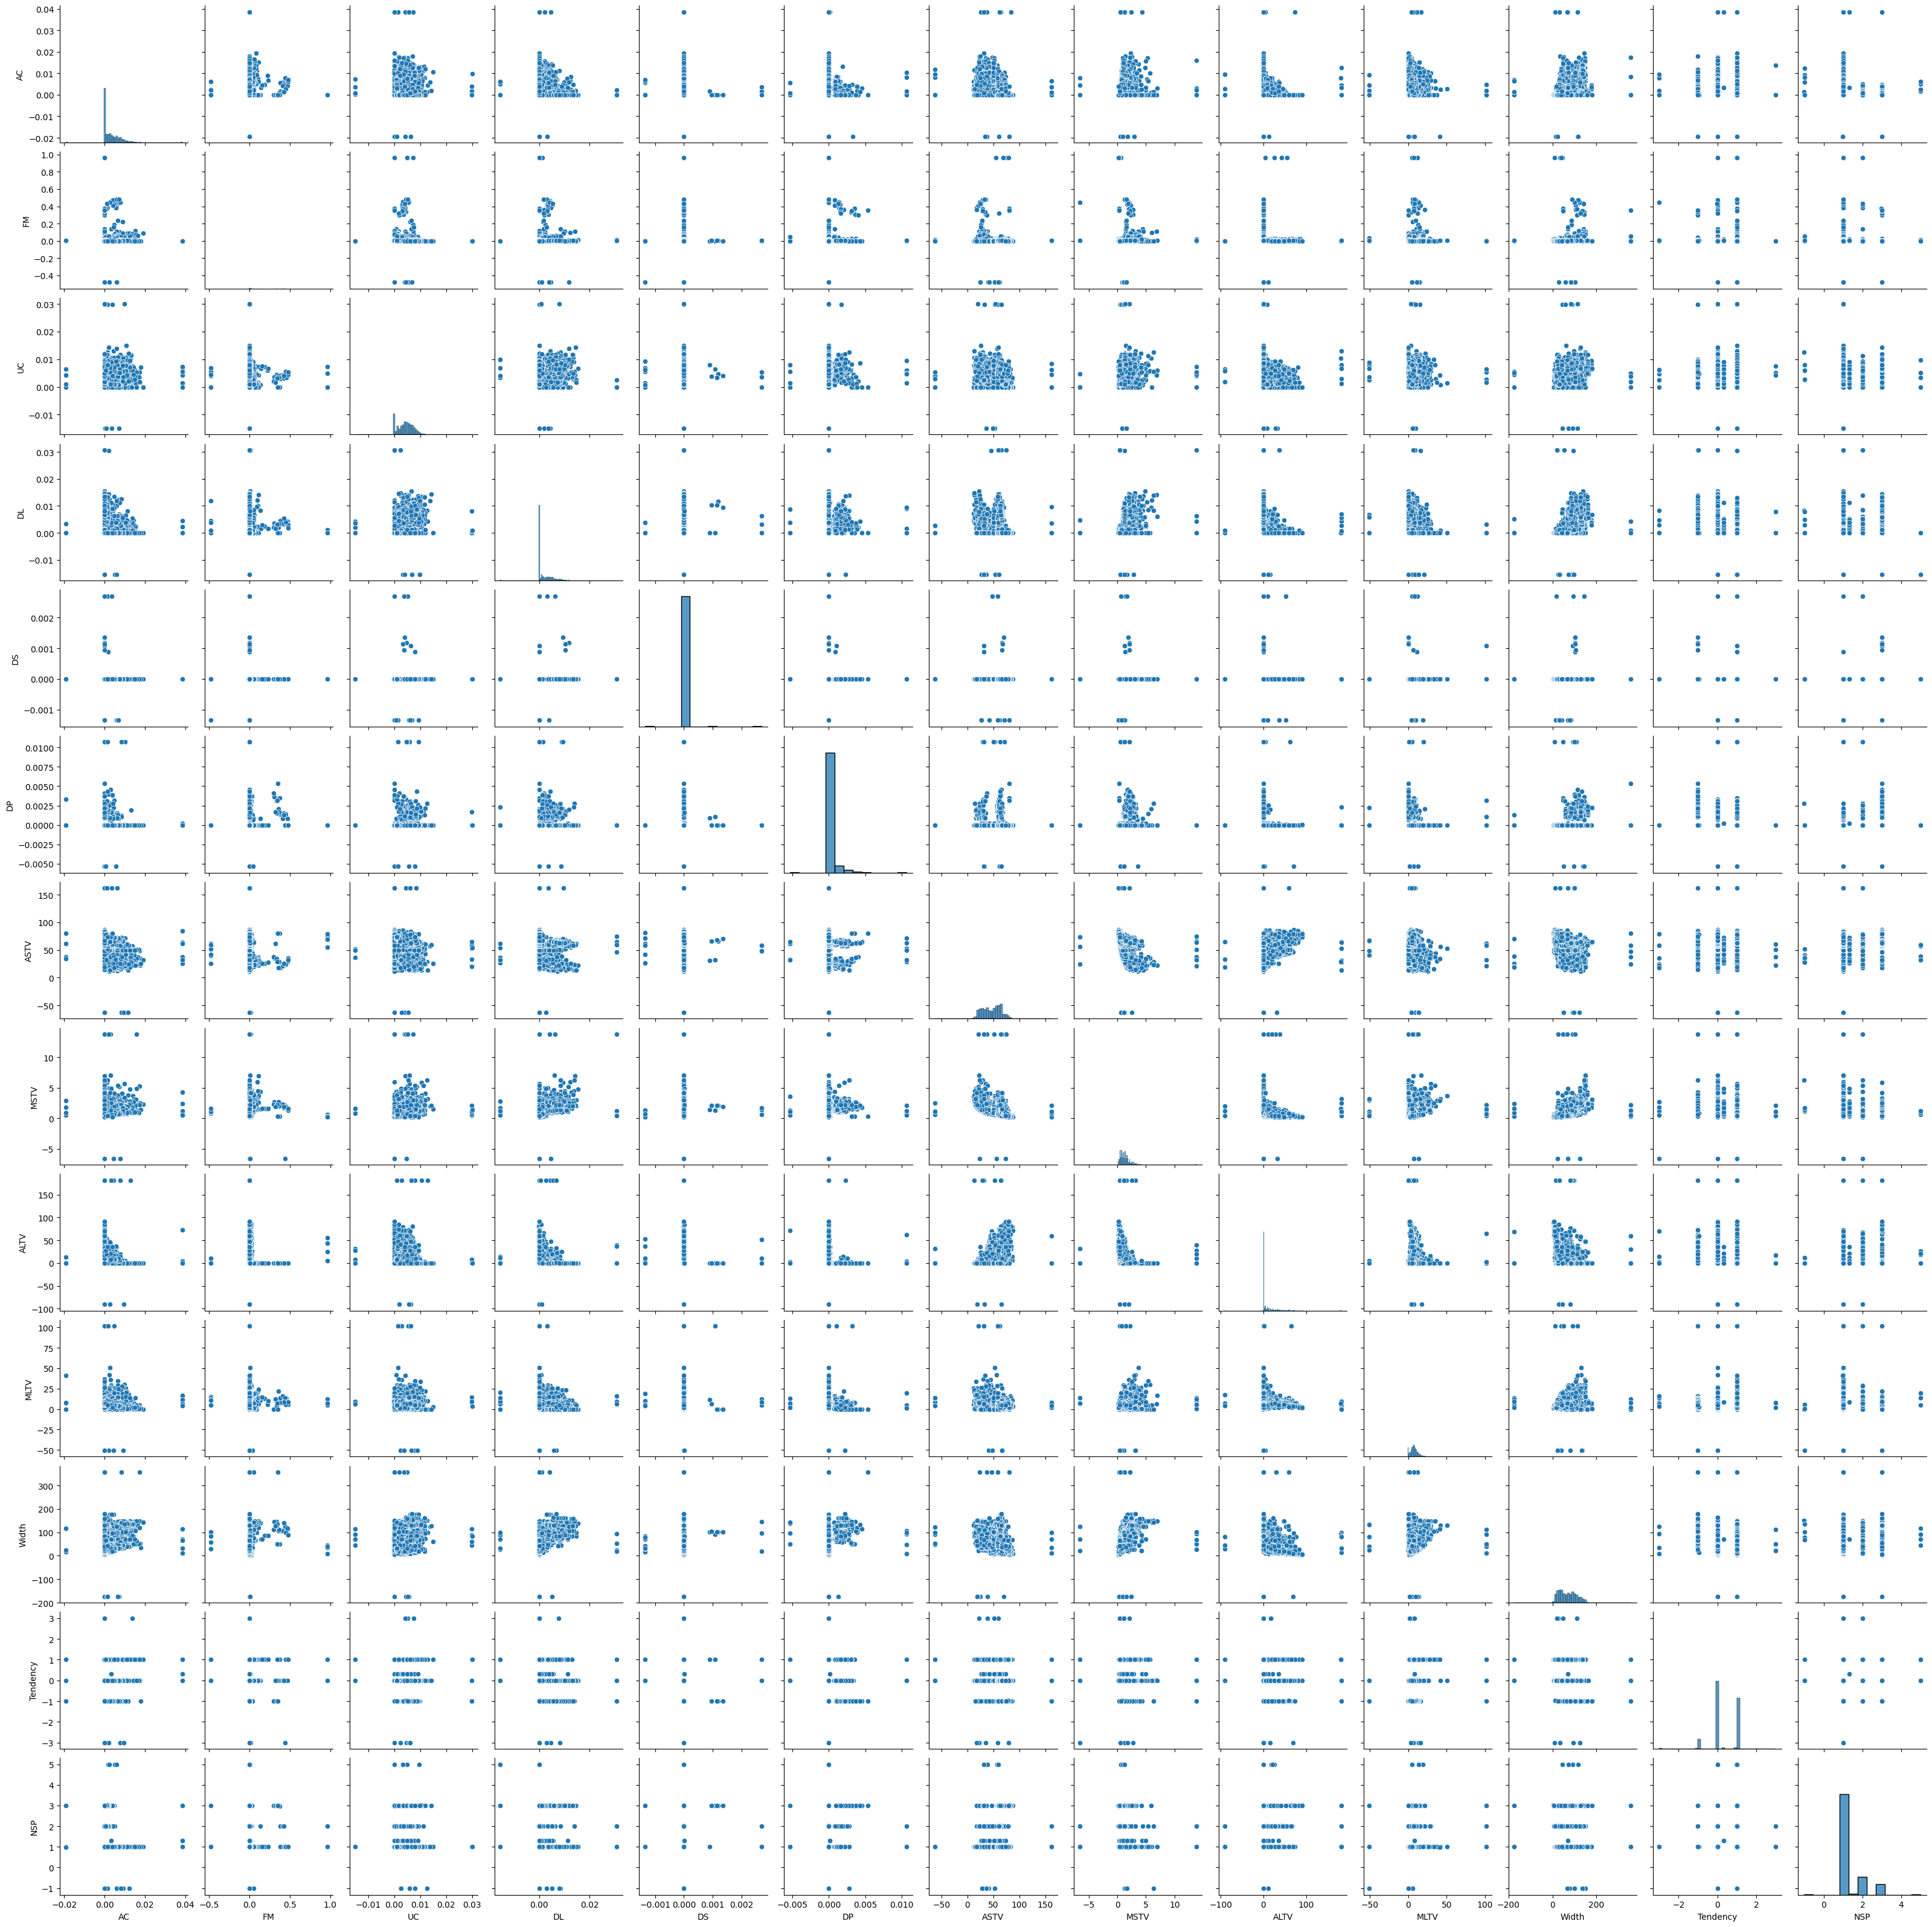

In [63]:
import seaborn as sns
sns.pairplot(data_cleaned)

In [65]:
#Correlation
data_cleaned.corr()

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
AC,1.000000,0.009406,0.071552,-0.093330,-0.033109,-0.083330,-0.231058,0.133903,-0.271204,-0.104658,0.234720,0.031896,-0.312189
FM,0.009406,1.000000,-0.053386,0.009641,0.029896,0.121248,-0.032838,0.017061,-0.012005,-0.006156,0.097125,-0.018408,0.073991
UC,0.071552,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066949,-0.185542
DL,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164942,0.408427,-0.023759,0.025095
DS,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.083330,0.121248,0.070348,0.144853,0.004282,1.000000,0.037955,0.119270,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,-0.231058,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,0.133903,0.017061,0.189685,0.410216,0.016079,0.119270,-0.293820,1.000000,-0.291979,0.028653,0.433232,-0.036652,-0.094634
ALTV,-0.271204,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107331,-0.346496,0.036504,0.365218
MLTV,-0.104658,-0.006156,-0.048754,-0.164942,0.034366,-0.113993,-0.219225,0.028653,-0.107331,1.000000,0.059031,0.116672,-0.113445


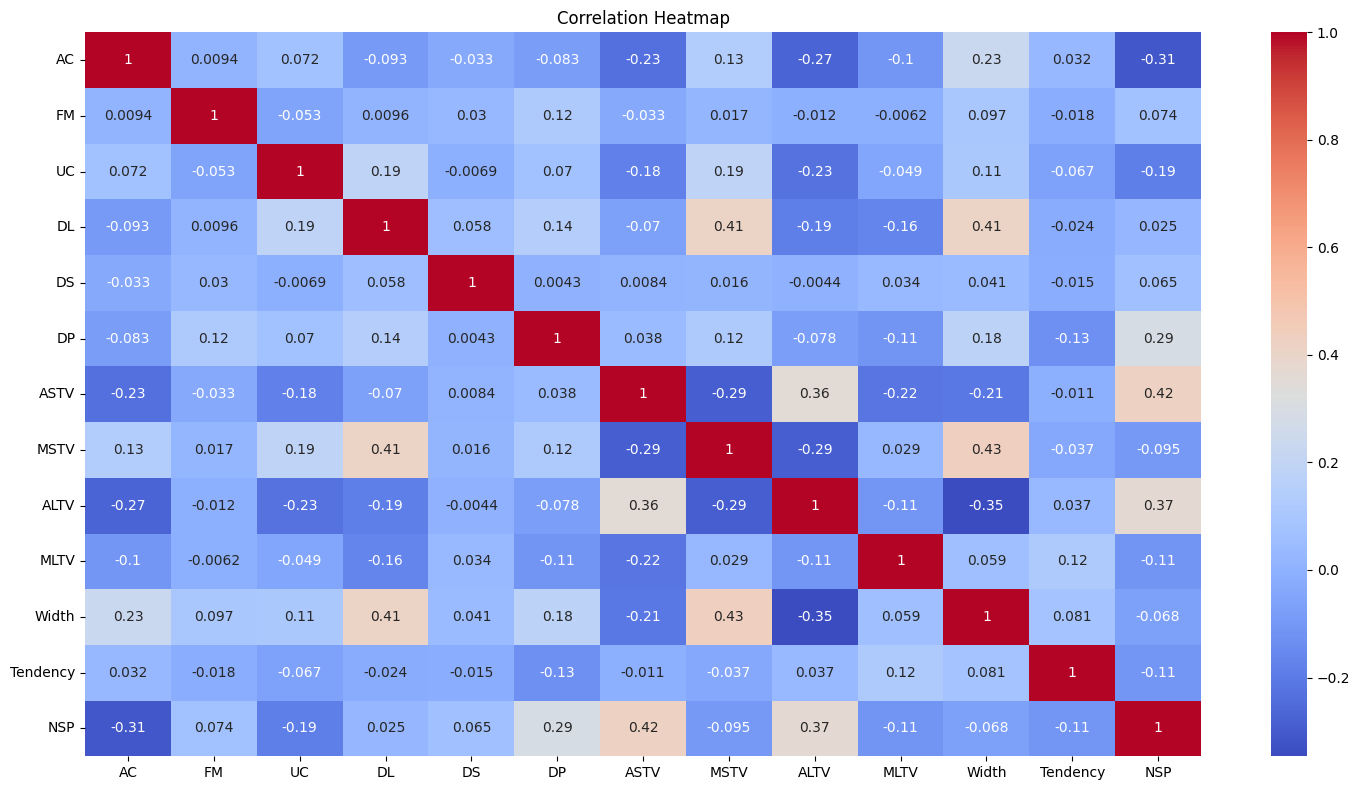

In [76]:
# Correlation heatmap
correlation = data_cleaned.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [77]:
correlation_matrix = data_cleaned.corr().abs()

# Print weak correlations
print("Weak correlations:")
print([(x, y, corr) for x, y, corr in [(correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]) for i in range(correlation_matrix.shape[0]) for j in range(i + 1, correlation_matrix.shape[1])] if 0.1 <= corr <= 0.3])

# Print moderate correlations
print("\nModerate correlations:")
print([(x, y, corr) for x, y, corr in [(correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]) for i in range(correlation_matrix.shape[0]) for j in range(i + 1, correlation_matrix.shape[1])] if 0.4 <= corr <= 0.7])


Weak correlations:
[('AC', 'ASTV', 0.23105844375743442), ('AC', 'MSTV', 0.1339033412678026), ('AC', 'ALTV', 0.27120362990102853), ('AC', 'MLTV', 0.10465755725192889), ('AC', 'Width', 0.23472043989930946), ('FM', 'DP', 0.12124835557035037), ('UC', 'DL', 0.1897365866154342), ('UC', 'ASTV', 0.18237949136516438), ('UC', 'MSTV', 0.18968485088424367), ('UC', 'ALTV', 0.22788136165003237), ('UC', 'Width', 0.1065503488120731), ('UC', 'NSP', 0.18554199396425905), ('DL', 'DP', 0.1448534885393539), ('DL', 'ALTV', 0.1872747765701692), ('DL', 'MLTV', 0.16494195975892856), ('DP', 'MSTV', 0.1192695721660932), ('DP', 'MLTV', 0.11399335030689792), ('DP', 'Width', 0.1752400743415889), ('DP', 'Tendency', 0.13050989910272456), ('DP', 'NSP', 0.29441559575006676), ('ASTV', 'MSTV', 0.2938201061478764), ('ASTV', 'MLTV', 0.21922465137129446), ('ASTV', 'Width', 0.20777801812730626), ('MSTV', 'ALTV', 0.2919790425737929), ('ALTV', 'MLTV', 0.1073306457936976), ('MLTV', 'Tendency', 0.11667202491465031), ('MLTV', 'NS

There are no strong correlations between any of the columns. Moderate correlations exist between DL and MSTV, DL and With, ASTV and NSP, and MSTV and Width.